In [ ]:
print("Hello Soha! Python is ready 😄")


Hello Soha! Python is ready 😄


In [ ]:
!pip install pandas matplotlib biopython



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 36.1 MB/s eta 0:00:00


In [3]:
import pandas as pd

df = pd.read_csv("first project.csv")

df.head()


,Domain: Data Coding Codon Start: 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16372,Unnamed: 16373,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381
0,NC_045512.2,A,T,T,A,A,A,G,G,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PX471851.1,-,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PX471996.1,-,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NC_045512.2,A,A,A,A,T,C,T,G,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns


Index(['Domain: Data  Coding Codon Start: 1', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 16372', 'Unnamed: 16373', 'Unnamed: 16374', 'Unnamed: 16375',
       'Unnamed: 16376', 'Unnamed: 16377', 'Unnamed: 16378', 'Unnamed: 16379',
       'Unnamed: 16380', 'Unnamed: 16381'],
      dtype='object', length=16382)

In [6]:
sequences = df.apply(lambda x: ''.join(x.dropna().astype(str)), axis=1)

for i, seq in enumerate(sequences[:2]):
    print(f"Sequence {i+1}: {seq[:100]}...")


Sequence 1: NC_045512.2ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTT...
Sequence 2: PX471851.1------------------------------------------------------...........................


In [7]:
reference = sequences[0]
mutations = []

for i, seq in enumerate(sequences[1:], start=2):
    for pos, (ref_base, sample_base) in enumerate(zip(reference, seq), start=1):
        if ref_base != sample_base and sample_base != '-':
            mutations.append({'Sequence': f'Seq{i}', 'Position': pos, 'Ref': ref_base, 'Alt': sample_base})

mut_df = pd.DataFrame(mutations)
mut_df.head()


,Sequence,Position,Ref,Alt
0,Seq2,1,N,P
1,Seq2,2,C,X
2,Seq2,3,_,4
3,Seq2,4,0,7
4,Seq2,5,4,1


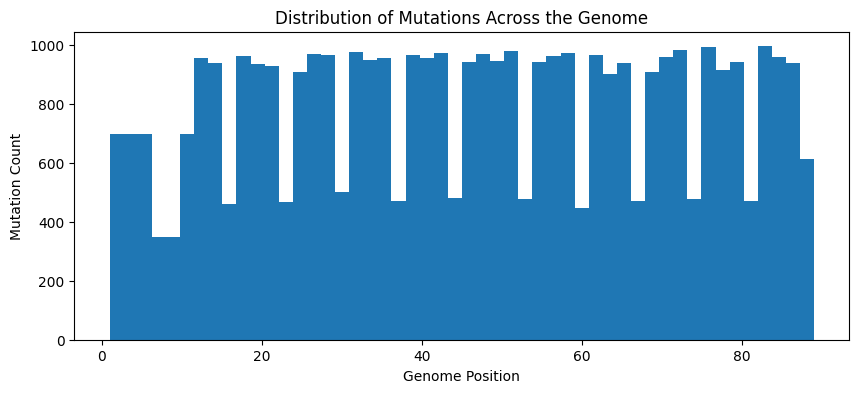

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.hist(mut_df['Position'], bins=50)
plt.xlabel('Genome Position')
plt.ylabel('Mutation Count')
plt.title('Distribution of Mutations Across the Genome')
plt.show()


In [9]:
total_mutations = mut_df.shape[0]
print("Total number of mutations:", total_mutations)


Total number of mutations: 40314


In [10]:
mut_per_seq = mut_df['Sequence'].value_counts()
print(mut_per_seq)


Sequence
Seq683    88
Seq687    88
Seq691    88
Seq439    88
Seq443    88
          ..
Seq109    49
Seq241    48
Seq349    47
Seq2      32
Seq3      31
Name: count, Length: 525, dtype: int64


In [11]:
top_positions = mut_df['Position'].value_counts().head(10)
print("Top 10 most mutated positions:")
print(top_positions)


Top 10 most mutated positions:
Position
35    507
75    504
43    503
82    502
30    501
51    500
39    500
72    499
48    496
55    495
Name: count, dtype: int64


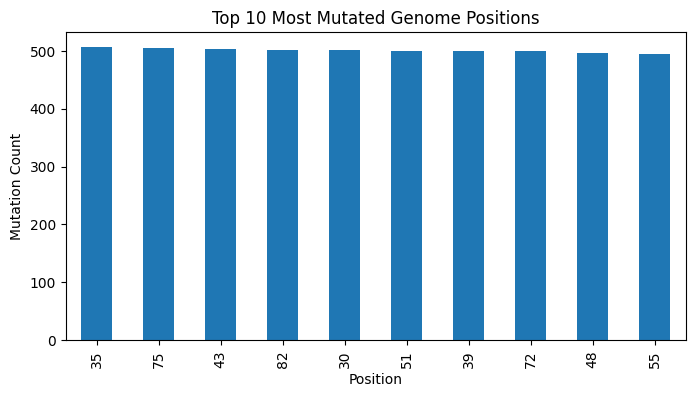

In [12]:
top_positions.plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Most Mutated Genome Positions")
plt.xlabel("Position")
plt.ylabel("Mutation Count")
plt.show()


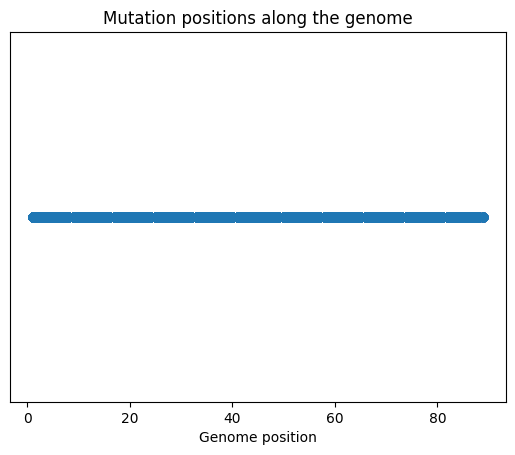

In [13]:
plt.scatter(mut_df["Position"], [1]*len(mut_df), alpha=0.7)
plt.title("Mutation positions along the genome")
plt.xlabel("Genome position")
plt.yticks([])
plt.show()
